<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/Jupyter_Notebooks/Two_body_HO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İlgili makaleler: </br>
[Busch, T., Englert, B. G., Rzażewski, K., & Wilkens, M. (1998). Two cold atoms in a harmonic trap. Foundations of Physics, 28(4), 549-559. ](https://link.springer.com/content/pdf/10.1023/A:1018705520999.pdf)

In [1]:
import numpy as np
import scipy.special as ss
import matplotlib.pyplot as plt
import math

from scipy import optimize
from scipy.integrate import quad, quadrature

Harmonik osilatörde radyal s-dalga fonksiyonu:
\begin{align}
Φ_n(r)=\frac{2*e^{-r^2/2}*L_n^{1/2}(r^2)}{π^{1/4}L_n^{1/2}(0)}
\end{align}

In [2]:
def phi_n(r, n):
  """
  Harmonik salınıcı s-dalga fonksiyonu

  Param r: radyal uzunluk
  Param n: principle quantum number

  Return: harmonik salınıcı s-dalga fonksiyonu sonucu
  """
  r2 = r*r
  return 2*np.exp(-r2/2)*ss.assoc_laguerre(r2,n,1/2) / ( np.pi**.25*np.sqrt(ss.assoc_laguerre(0,n,1/2)) )

Harmonik salıcının s-dalga fonsiyonunun ortanormallik bağıntısı:
\begin{align}
\braket{Φ_n(r)}{Φ_m(r)}= \int_{-\infty}^{\infty}Φ_n^*(r)Φ_m(r)r^2dr=δ_{nm} 
\end{align}

In [3]:
def phi_n_orth(r, n, m):
  """
  Harmonik salıcının s-dalga fonsiyonunun ortanormallik fonksiyonu

  Param: r radyal uzunluk
  Param: n principle quantum number
  Param: m principle quantum number

  Return: Fonsiyon sonucu
  """
  r2 = r*r
  return phi_n(r, n)*phi_n(r, m)*r2

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$𝜱(n)$'nin ortonormallğini testi <br>
\begin{align}
\braket{Φ_1(r)}{Φ_1(r)}=1
\end{align}

In [4]:
quad(phi_n_orth, 0, np.inf, args=(1, 1), limit=200)

(1.0, 3.8977284020881205e-09)

\begin{align}
\braket{Φ_1(r)}{Φ_0(r)}=0
\end{align}

In [5]:
quad(phi_n_orth, 0, np.inf, args=(1, 0), limit=200)

(7.632783294297951e-16, 4.170346566622374e-09)

Sonlu kuyu potansiyeli:
\begin{align}
V(r)=
\begin{cases}
-V_0 & 0<r<r_0 \\
0 & otherwise
\end{cases}
\end{align}

In [6]:
def Vint(r, r0, q):
  """
  Sonlu kuyu potansiyeli

  Param r: radyal uzunluk
  Param r0: sonlu kuyunun genişliği
  Param q: sonlu kuyunun derinliği (V0 = q^2/2m) 

  Return: konumdaki potansiyel
  """
  return -np.power(q,2)*np.heaviside(r0-r,0.5)

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
Harmonik tuzak içersindeki çarpışmalarda:
\begin{align}
H_{rel} = \frac{\hbar^2}{2m_r}\nabla^2+V_{har}+V_{int} = H_{har} + V_{int}
\end{align}
Burada $V_{har}$ harmonik potansiyel, $V_{int}$ etkileşim potansiyelidir.

Oluşan etkileşimin dalga fonksiyonun $\ket{𝜳}$ harmonik salıcının tam bir baz oluşturan dalga fonksiyonları $\ket{𝜓_{nlm}}$ ile tanımlarsak
\begin{align}
\ket{𝜳} = \sum_{n,l,m} c_{nlm}\ket{𝜓_{nlm}}
\end{align}

Zamandan bağımsız Schrödinger denkleminde
\begin{align}
H_{rel}\ket{𝜳} = E_{rel}\ket{𝜳}
\end{align}
Böylece;
\begin{align}
H_{rel}\sum_{n,l,m} c_{nlm}\ket{𝜓_{nlm}}=E_{rel}\sum_{n,l,m} c_{nlm}\ket{𝜓_{nlm}}
\end{align}
İki tarafıda $\bra{𝜓_{n^\prime l^\prime m^\prime}}$ ile çarparsak
\begin{align}
\sum_{n,l,m} c_{nlm}(E_{n^\prime l^\prime m^\prime}δ_{nn^\prime}δ_{ll^\prime}δ_{mm^\prime} + \bra{𝜓_{n^\prime l^\prime m^\prime}}V_{int}\ket{𝜓_{nlm}}) = E_{rel}c_{n^\prime l^\prime m^\prime}
\end{align}

S-dalga durumunda yani $l=m=0$ denklem söyle yazılır:

\begin{align}
\sum_{n} c_{n}(E_{n^\prime}δ_{nn^\prime} + \bra{𝜓_{n^\prime}}V_{int}\ket{𝜓_{n}}) = E_{rel}c_{n^\prime}
\end{align}

Bu denklemin oluşturacağı öz değer öz cektör problemli çözülerek $E_{rel}$'ler ve$c_n$'ler bulunabilir.
\begin{align}
H_{n^\prime n}c_n=E_{rel}c_{n^\prime}
\end{align}

In [7]:
def int_func(r, n, m, r0, q):
  """
  <n'|V_int|n> indetralinin fonksiyonu.

  Param r: radyal uzunluk
  Param n: n principle quantum number
  Param m: n' principle quantum number
  Param r0: V_int sonlu kuyu etkileşim potansiyelinin genişliği
  Param q: V_int sonlu kuyu etkileşim potansiyelinin derinliği (V0 = q^2/2m) 

  Retrun: Fonsiyon hesabının sonucu
  """
  return phi_n(r, n)*phi_n(r, m)*Vint(r, r0, q)*r**2

In [8]:
def get_Hrel(nmax, r0, q):
  """
  H_n'n matrisin hesaplama

  Param nmax: hesaplamada kullanılacak maksimum |n> dalga fonsiyonu saysı
  Param r0: sonlu kuyu etkileşim potansilenin genişliği
  Param q: sonlu kuyu etkileşim potansiyelinin derinliği (V0 = q^2/2m) 

  return Hrel: H_n'n matrisi
  """

  Hrel = np.zeros([nmax,nmax])

  for n in range(nmax):
      Hrel[n,n] = 2*n+1.5 + quadrature(int_func, 0, r0, args=(n, n, r0, q))[0]

  for n in range(nmax):
      for m in range(n+1,nmax):
          Hrel[n,m] = quadrature(int_func, 0, r0, args=(n, m, r0, q))[0]
          Hrel[m,n] = Hrel[n,m]
  return Hrel

Örnek $H_{n^\prime n}$ matris hesabı

CPU times: user 1.95 s, sys: 8.31 ms, total: 1.96 s
Wall time: 1.99 s


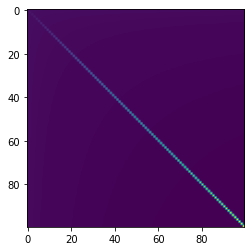

In [9]:
%%time
nmax = 100
q=100.0
r0=.05
Hrel = get_Hrel(nmax, r0, q)
plt.imshow(Hrel)

Etkilkeşim ptansiyeli olan sonlu kuyunun derinliği $V_0=q^2/2m$ ve kuyunun genişliği $r_0$ olmak üzere scattering length:
\begin{align}
a_s = r_0 - \frac{tan(qr_0)}{q}
\end{align}


In [11]:
def get_as(r0,q):
  """
  Sonlu harmonik kuyu için scattering length hesaplama.

  Param r0: sonlu kuyunun genişliği
  Param q: sonlu kuyunun derinliği (V0 = q^2/2m) 

  return: scattering length
  """
  qr0=r0*q
  return r0*(1-np.tan(qr0)/qr0)

Sonlu kuyu potansiyelinde sabit kuyu genişliği $r_0 = 0.05$ ile kuyu derinliğine $q$ karşı scattering length $a_s$

Text(0.5, 0, '$q$')

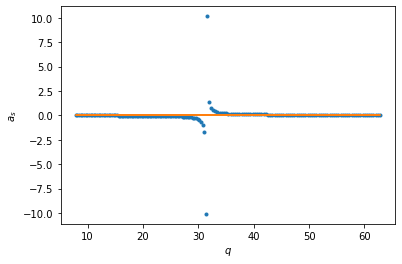

In [12]:
r0 = 0.05
qstar=np.pi/(2*r0)
Na0 = 80
qlist = np.linspace(qstar*1.002,qstar*2,Na0)
qlist = np.array ([*qlist, *np.linspace(qstar/4,qstar*.998,Na0)])
aslist = get_as(r0,qlist)


plt.plot(qlist,aslist,'.')
plt.plot(qlist,0*aslist)
plt.ylabel(r"$a_s$")
plt.xlabel(r"$q$")

Harminik tuzakta sonlu kuyu etkileşim potansiyeline sahip sahip iki parçasığın relative koordinat çözümleri

In [ ]:
%%time
nmax=100
res = []
for q in qlist:
    Hrel = get_Hrel(nmax,r0,q)
    ee, uu = np.linalg.eigh(Hrel)
    res.append(ee)
    
all_eigs = np.array(res)

CPU times: user 4min 56s, sys: 17.2 s, total: 5min 14s
Wall time: 4min 55s


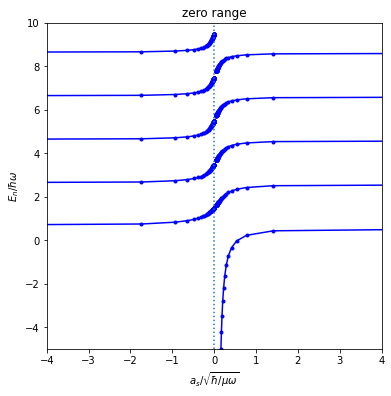

In [ ]:
plt.figure(figsize=(6,6))
isplit = len(aslist)//2
for i in range(5):
    plt.plot(aslist[:isplit],all_eigs[:isplit,i],'b.-');
    plt.plot(aslist[isplit:],all_eigs[isplit:,i],'b.-');
    
#plt.plot(a0list,scatter.r_0_W(k0list*R)*R,'r--', label=r"$r_0$");

plt.xlim([-4,4])
plt.ylim([-5,10])
plt.xlabel(r"$a_s/\sqrt{\hbar/\mu\omega}$")
plt.ylabel(r"$E_n/\hbar\omega$")
plt.title("zero range")
plt.axvline(0,ls=':');
#plt.legend(loc=4);

Seçilen abir bir scattering length $a_s=1$ için harmonik tuzak içinde sonlu kuyu etkileşimine sahip iki parçacık için kuyu genişliğine $r_0" göre enerji çözümü

In [31]:
%%time
nmax = 100
r0_list = np.linspace(0.001, 0.5, 50)

res = []
for r0 in r0_list:
  q = optimize.fsolve(lambda q: get_as(r0,q)-1, np.pi/(2*r0/1.01))[0]
  Hrel = get_Hrel(nmax, r0, q)
  ee, uu = np.linalg.eigh(Hrel)
  res.append(ee)
    
all_eigs = np.array(res)

CPU times: user 2min 36s, sys: 5.54 s, total: 2min 42s
Wall time: 2min 38s


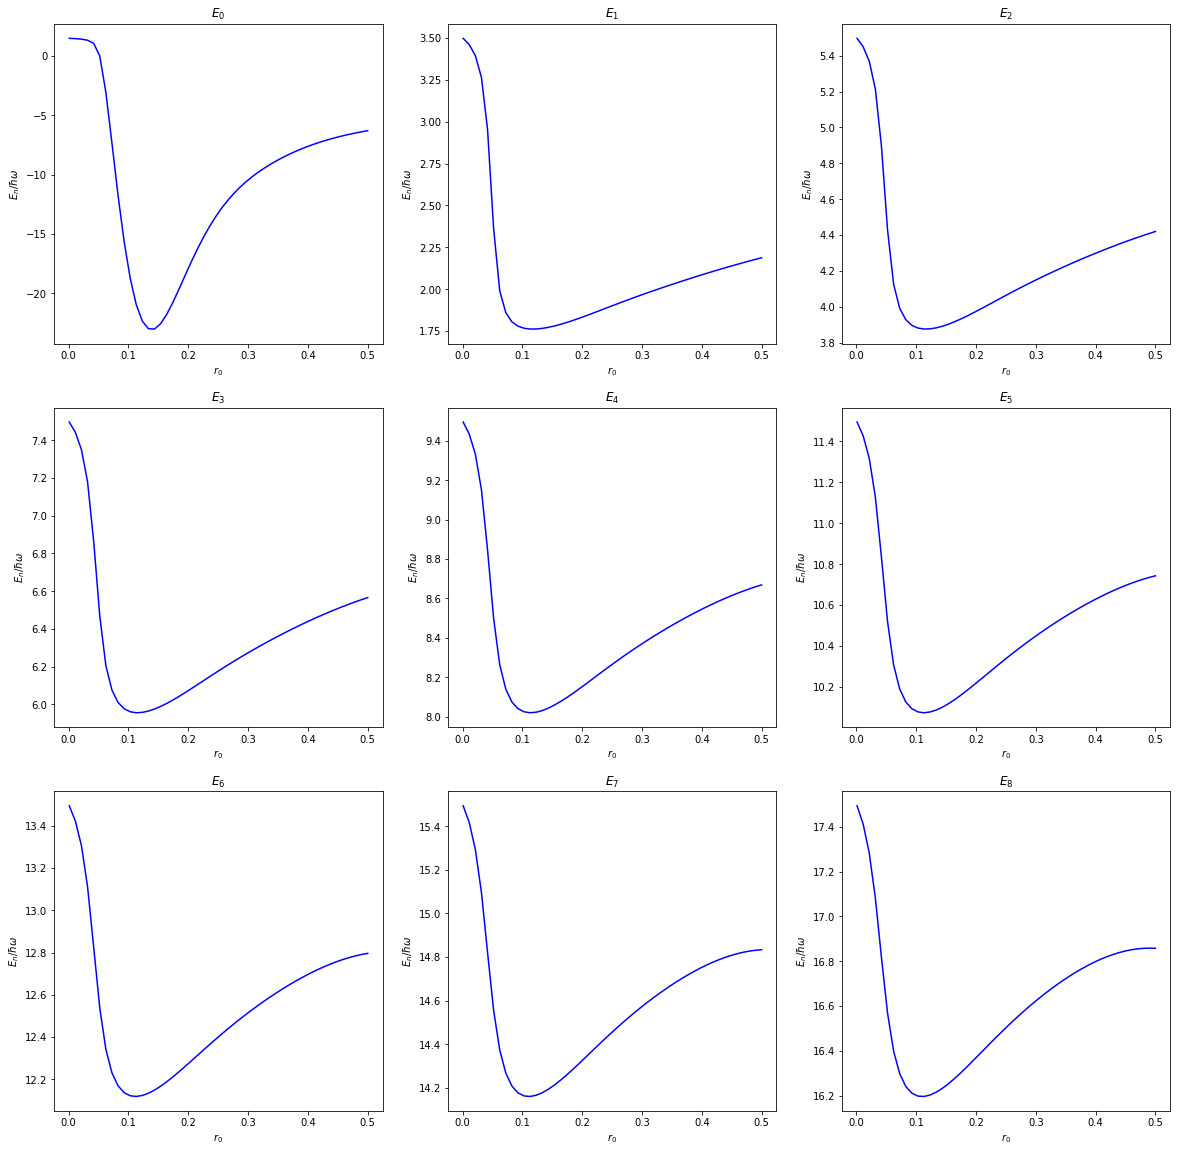

In [32]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax_list = ax.flatten()

for i, ax in enumerate(ax_list):
  ax.plot(r0_list, all_eigs[:,i], 'b')
  ax.set_ylabel(r"$E_n/\hbar\omega$")
  ax.set_xlabel("$r_0$")
  ax.set_title("$E_%d$" %i)

Nmax'a göre enerji çözümlerinin davranışı

In [26]:
%%time
nmax_list = np.arange(50, 1001, 50)
r0 = 0.05
q = 100
res = []
for nmax in nmax_list:
    Hrel = get_Hrel(nmax, r0, q)
    ee, uu = np.linalg.eigh(Hrel)
    res.append(ee[:12])
    
all_eigs = np.array(res)

CPU times: user 48min 4s, sys: 8.54 s, total: 48min 13s
Wall time: 48min 15s


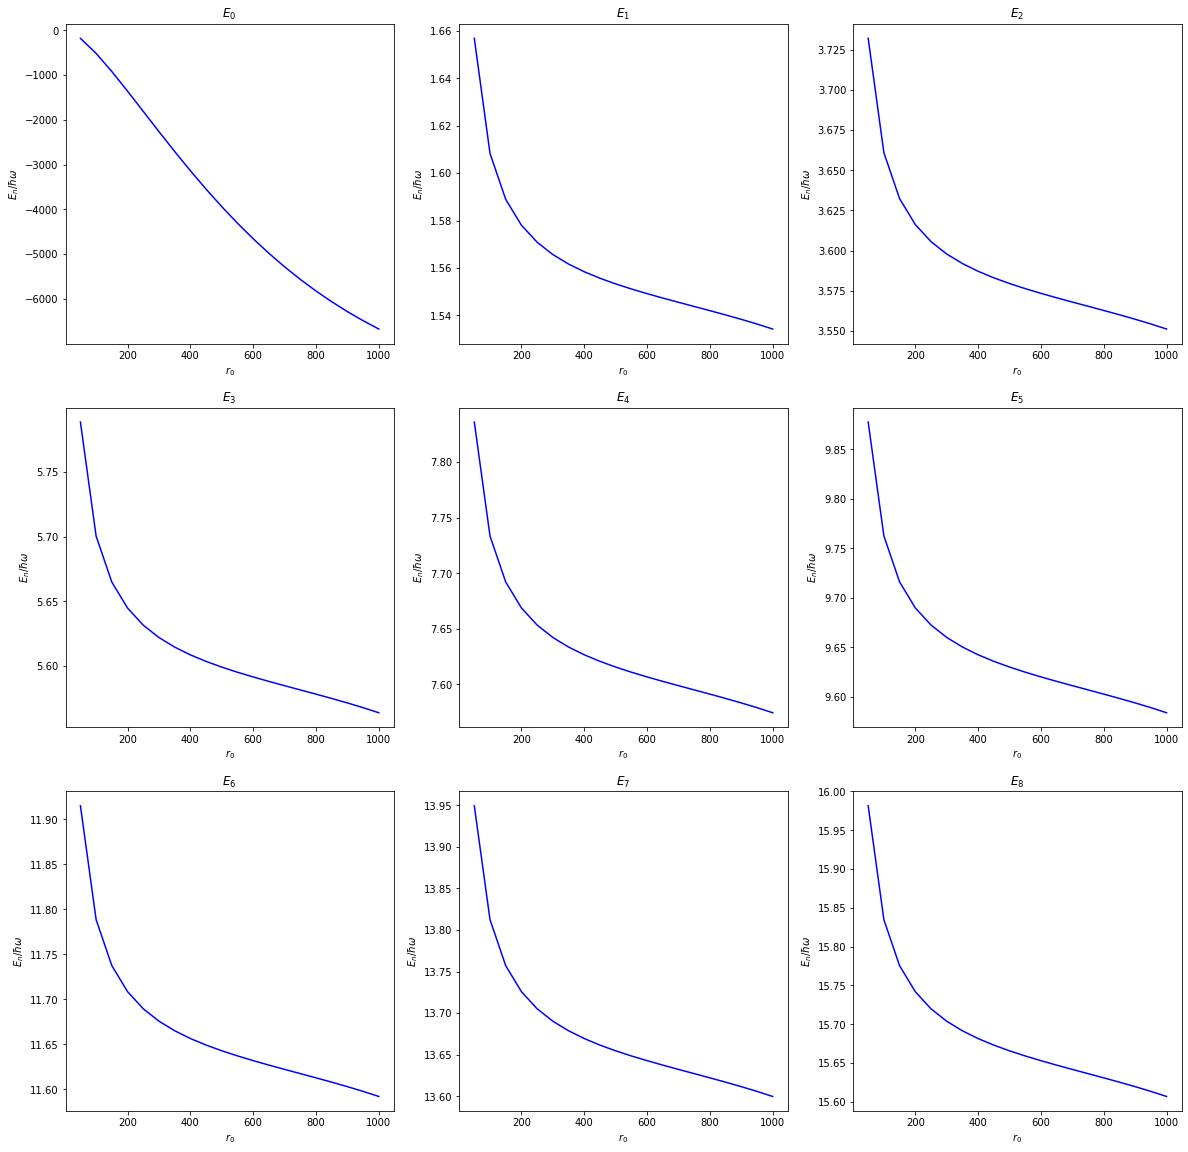

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax_list = ax.flatten()

for i, ax in enumerate(ax_list):
  ax.plot(nmax_list, all_eigs[:,i], 'b')
  ax.set_ylabel(r"$E_n/\hbar\omega$")
  ax.set_xlabel(r"$r_0$")
  ax.set_title("$E_%d$" %i)